1- Age: age of the patient [years]

2- Sex: sex of the patient [M: Male, F: Female]

3- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4- RestingBP: resting blood pressure [mm Hg]

5- Cholesterol: serum cholesterol [mm/dl]

6- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10- Oldpeak: oldpeak = ST [Numeric value measured in depression]

11- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12- HeartDisease: output class [1: heart disease, 0: Normal]



In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif

In [2]:
df=pd.read_csv('/content/heart 2.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
len(df)

918

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.median()

<ipython-input-7-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

In [8]:
df.skew()

<ipython-input-8-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
df.shape

(918, 12)

Exploratory Data Analysis

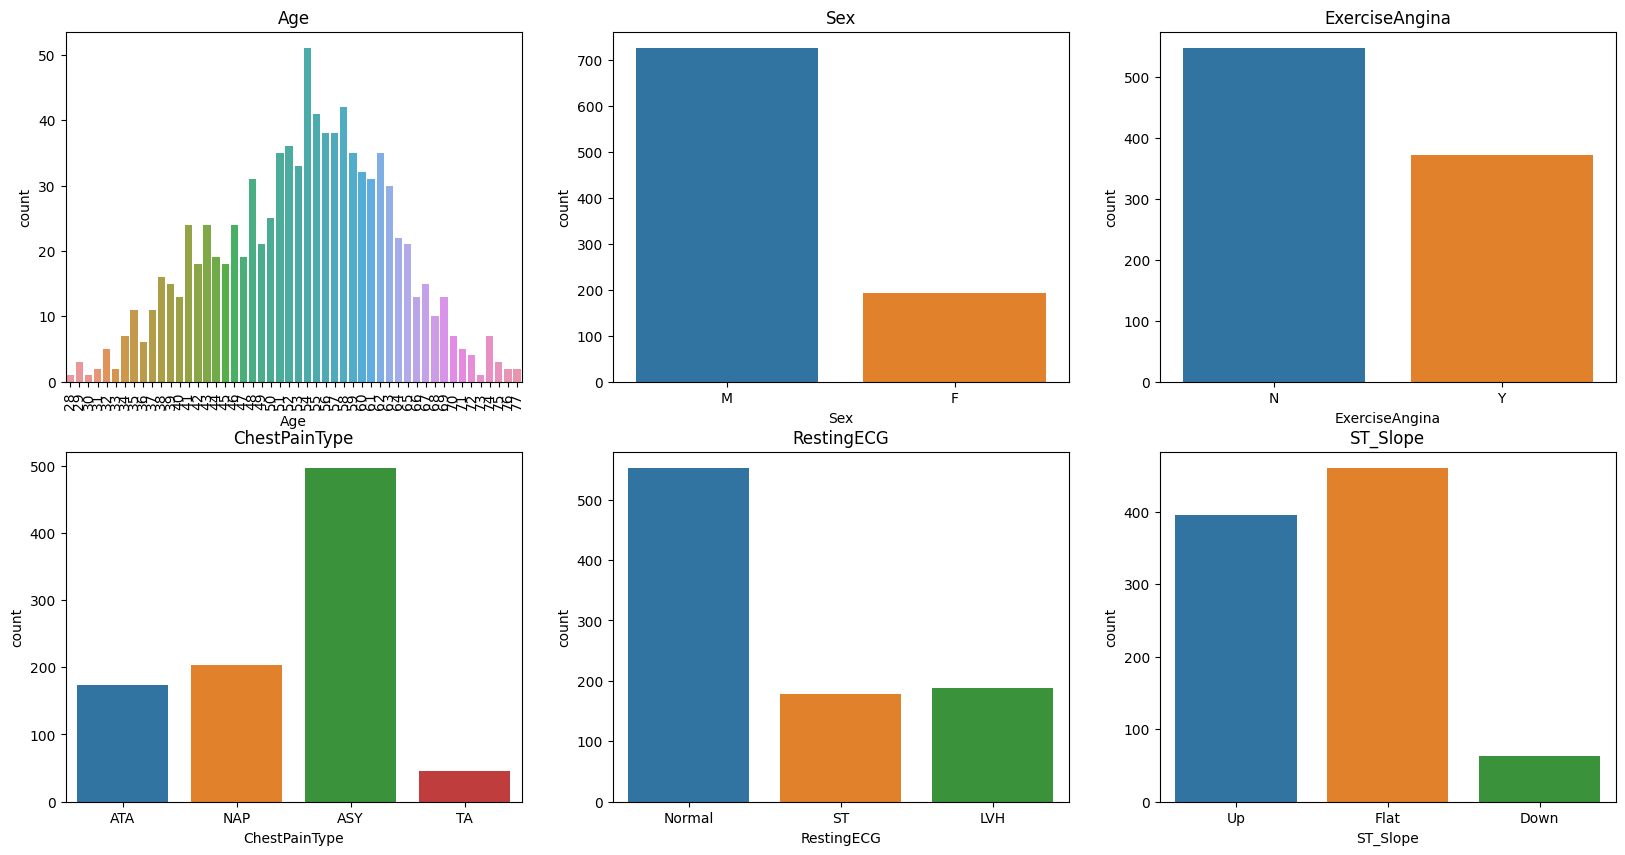

In [12]:
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(20,10))
sns.countplot(data=df,x='Age',ax=ax[0,0])
sns.countplot(data=df,x='Sex',ax=ax[0,1])
sns.countplot(data=df,x='ExerciseAngina',ax=ax[0,2])
sns.countplot(data=df,x='ChestPainType',ax=ax[1,0])
sns.countplot(data=df,x='RestingECG',ax=ax[1,1])
sns.countplot(data=df,x='ST_Slope',ax=ax[1,2])
ax[0, 0].set_title('Age')
ax[0, 1].set_title('Sex')
ax[0, 2].set_title('ExerciseAngina')
ax[1, 0].set_title('ChestPainType')
ax[1, 1].set_title('RestingECG')
ax[1, 2].set_title('ST_Slope')

ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)

plt.show()

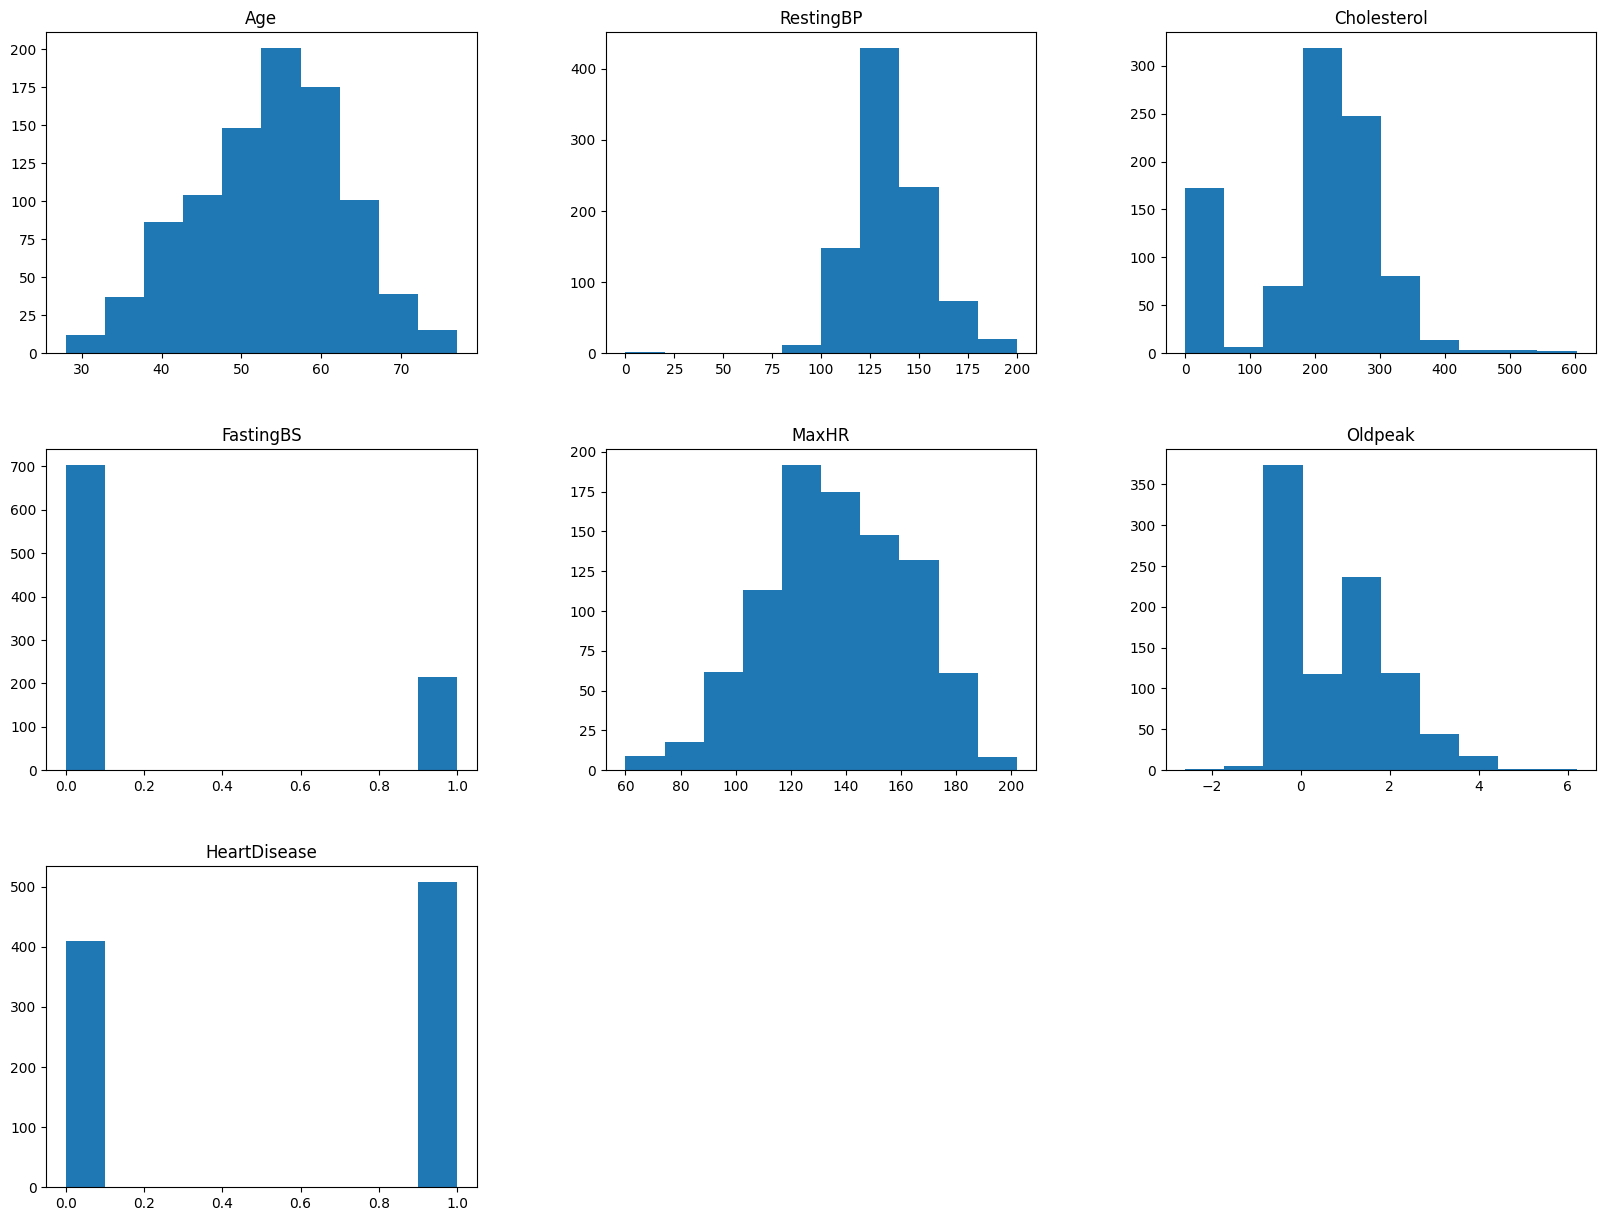

In [13]:
df.hist(figsize = (20,15), grid = False)
plt.show()

<ipython-input-14-749c5fe0c475>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f');


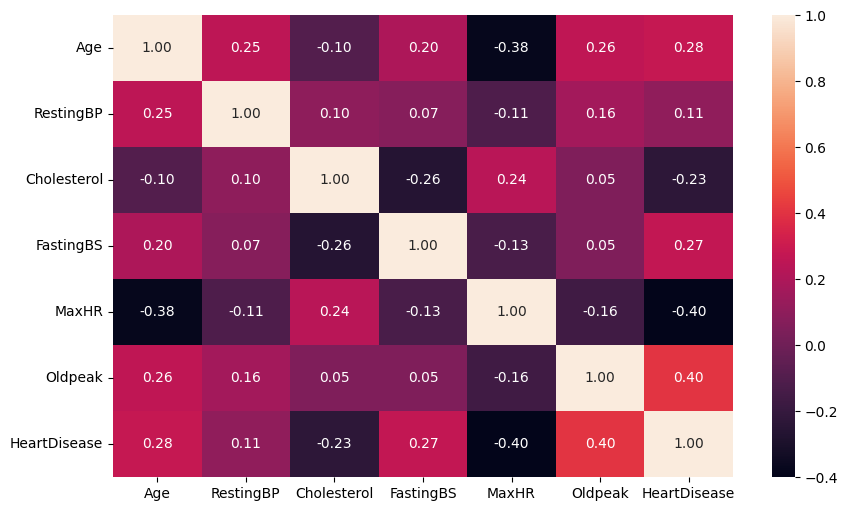

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

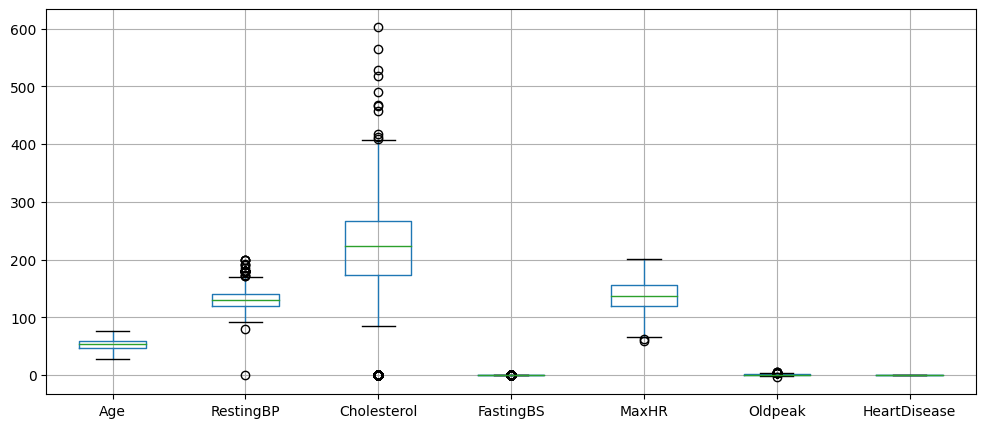

In [15]:
df.boxplot(figsize=(12,5));

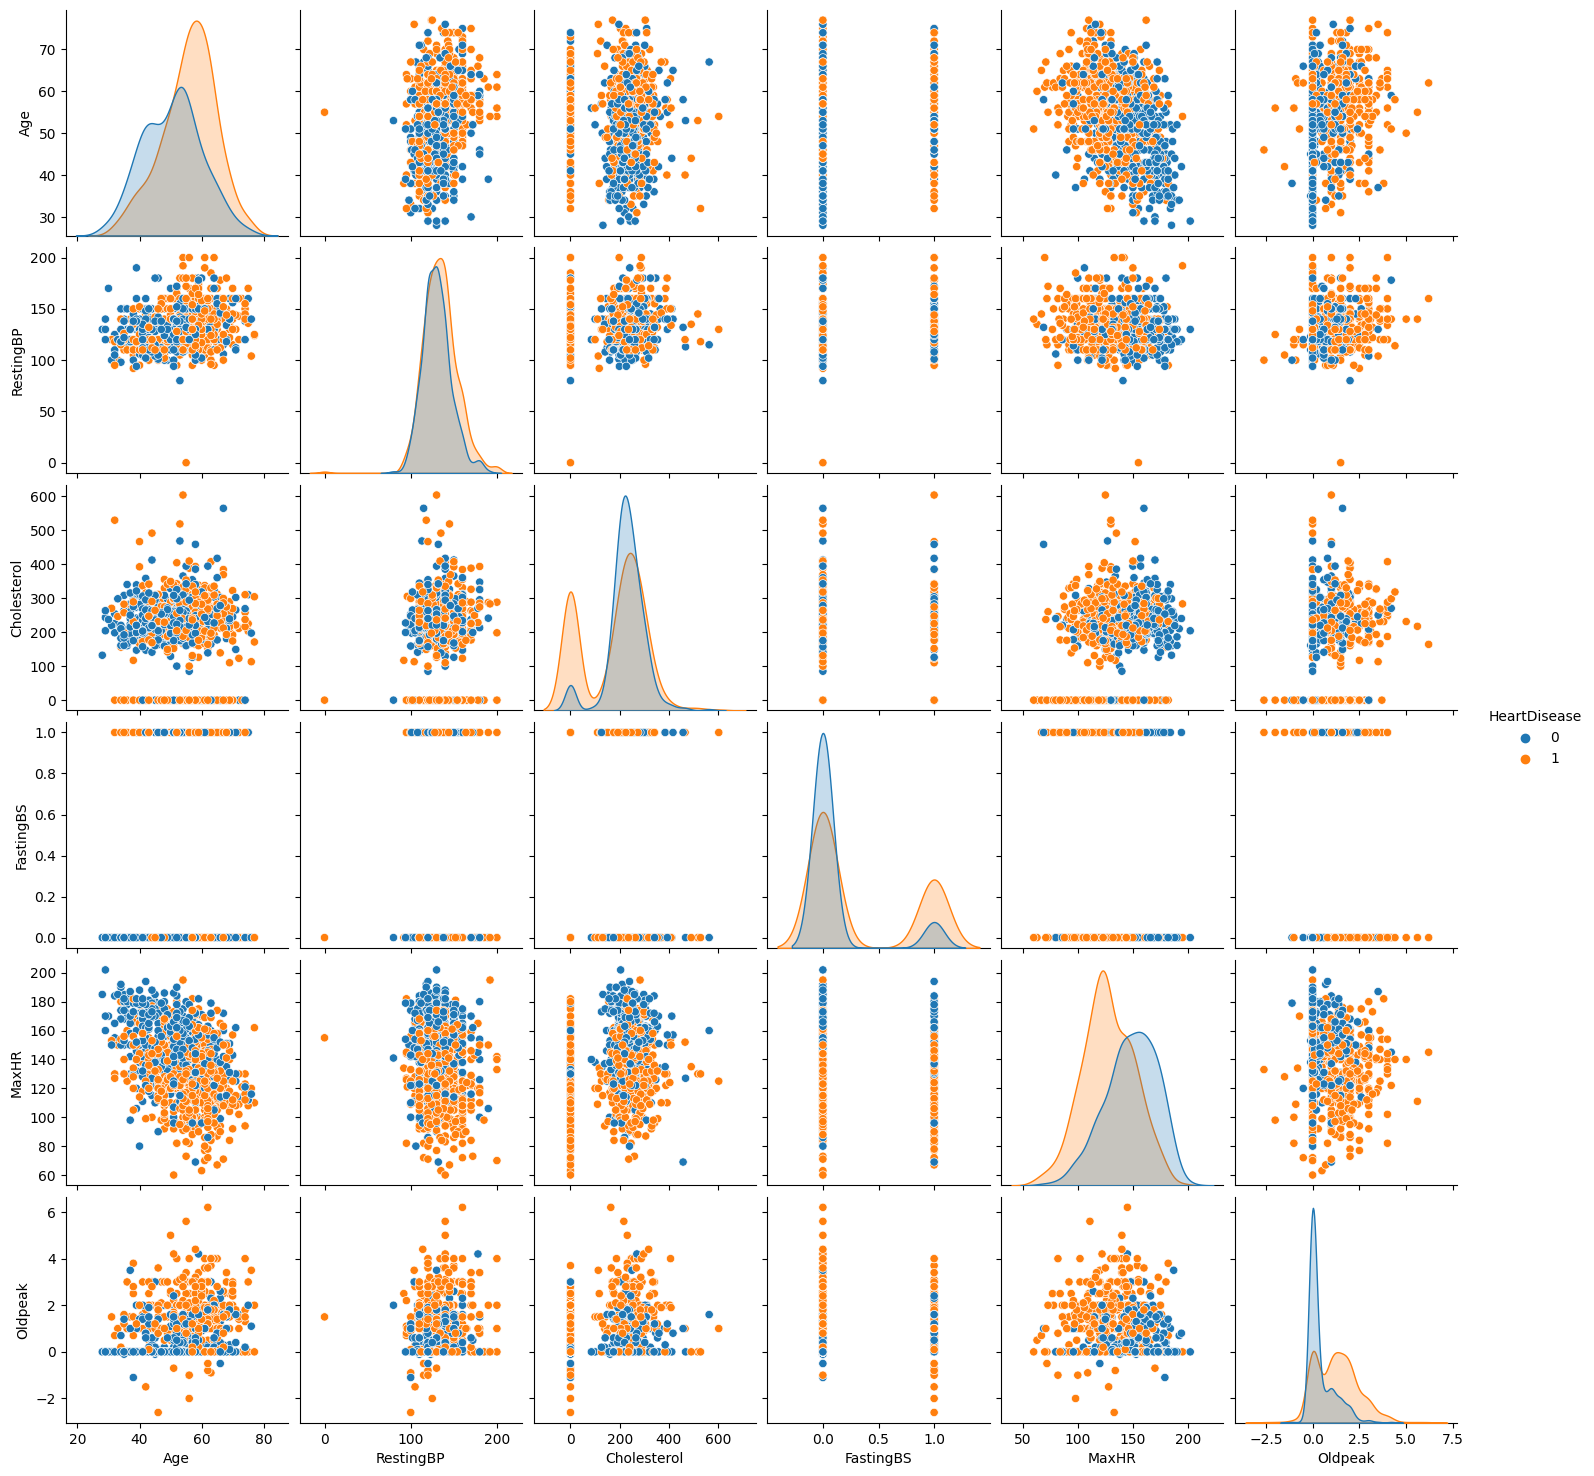

In [16]:
sns.pairplot(df,hue='HeartDisease')

Encoder

In [17]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['ChestPainType']=lb.fit_transform(df['ChestPainType'])
df['RestingECG']=lb.fit_transform(df['RestingECG'])
df['ExerciseAngina']=lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=lb.fit_transform(df['ST_Slope'])

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [19]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
min_max=MinMaxScaler()
scaled_x=min_max.fit_transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
f_scores, p_values = f_classif(x, y)
feature_selection_results = pd.DataFrame({
    'Feature': x.columns,
    'F-Score': f_scores,
    'P-Value': p_values
})

significant_features = feature_selection_results[feature_selection_results['P-Value'] < 0.05]
print("Selected Features:")
print(significant_features)


Selected Features:
           Feature     F-Score       P-Value
0              Age   79.160779  3.007953e-18
1              Sex   94.253184  2.821898e-21
2    ChestPainType  161.185346  3.888795e-34
3        RestingBP   10.727228  1.095315e-03
4      Cholesterol   52.459725  9.308309e-13
5        FastingBS   70.478543  1.753598e-16
7            MaxHR  174.913585  1.137786e-36
8   ExerciseAngina  296.144771  1.013018e-57
9          Oldpeak  178.615120  2.390772e-37
10        ST_Slope  415.830346  1.671599e-76


<ipython-input-29-a00126afc8f9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')


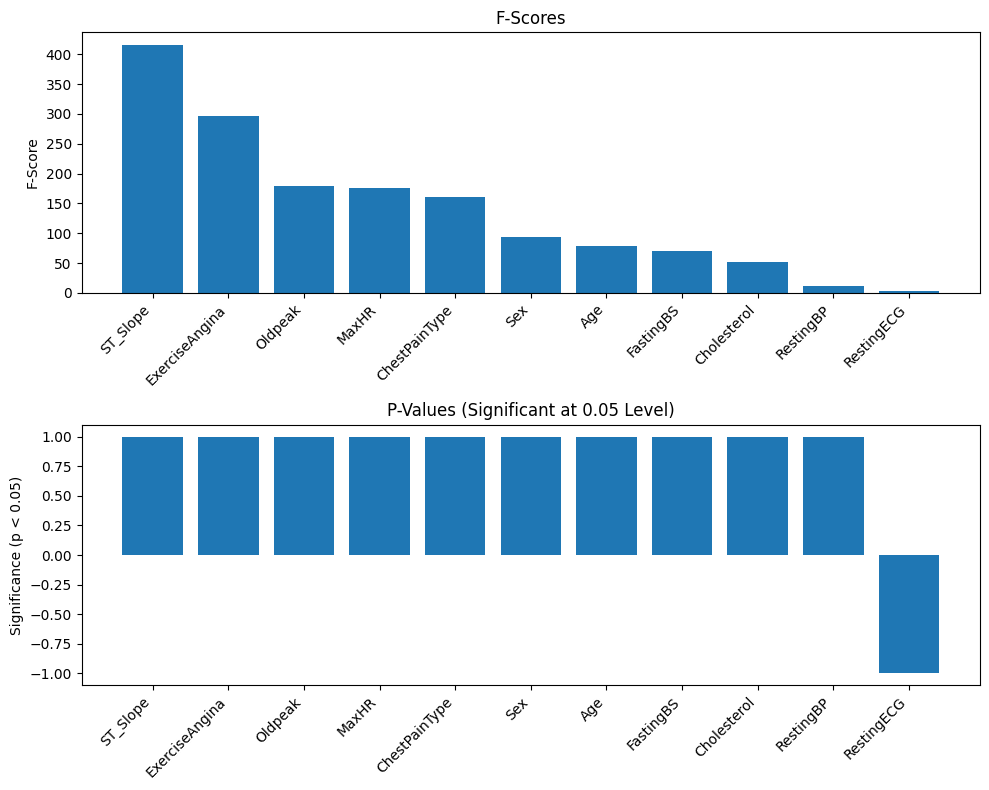

In [29]:
feature_selection_results=feature_selection_results.sort_values(by='F-Score',ascending=False)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar plot for F-Scores
ax[0].bar(feature_selection_results['Feature'], feature_selection_results['F-Score'])
ax[0].set_title('F-Scores')
ax[0].set_ylabel('F-Score')

# Bar plot for P-Values
ax[1].bar(feature_selection_results['Feature'], -1 * feature_selection_results['P-Value'].apply(lambda x: -1 if x < 0.05 else 1))
ax[1].set_title('P-Values (Significant at 0.05 Level)')
ax[1].set_ylabel('Significance (p < 0.05)')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Logistic Regression

In [21]:
lr=LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
prediction=lr.predict(x_test)

print(classification_report(y_test,prediction))
print("accuracy: ",accuracy_score(y_test,prediction))
print("mean_absolute_error: ",mean_absolute_error(y_test, prediction))
print("mean_squared_error: ",mean_squared_error(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.90      0.83      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230

accuracy:  0.8521739130434782
mean_absolute_error:  0.14782608695652175
mean_squared_error:  0.14782608695652175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
prediction_train=lr.predict(x_train)
prediction_test=lr.predict(x_test)

report_train=classification_report(y_train,prediction_train)
report_test=classification_report(y_test,prediction_test)
print('classification report on train set:',report_train)
print('classification report on test set : ',report_test)

classification report on train set:               precision    recall  f1-score   support

           0       0.85      0.83      0.84       312
           1       0.86      0.88      0.87       376

    accuracy                           0.86       688
   macro avg       0.86      0.85      0.85       688
weighted avg       0.86      0.86      0.86       688

classification report on test set :                precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.90      0.83      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230



In [79]:
new_data = pd.DataFrame({'Age': [53],'Sex': [1],'ChestPainType': [0],'RestingBP': [125],'Cholesterol': [0],'FastingBS': [1],
                         'RestingECG': [1],'MaxHR': [120],'ExerciseAngina': [0],'Oldpeak': [1.5],'ST_Slope': [2]})
scaled_new_data=min_max.transform(new_data)
predict_new_data=lr.predict(new_data)
probability_of_heart_disease=lr.predict_proba(scaled_new_data)[:,1]
percentage_of_heart_disease = probability_of_heart_disease * 100
print("Predicted Class Label : ", predict_new_data)
print("Probability of Heart Disease : ", percentage_of_heart_disease.round())

Predicted Class Label :  [1]
Probability of Heart Disease :  [63.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Random Forest Classifier

In [24]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
prediction_rfc=rfc.predict(x_test)

print(classification_report(y_test,prediction_rfc))
print("accuracy: ",accuracy_score(y_test,prediction_rfc))
print("mean_absolute_error: ",mean_absolute_error(y_test, prediction_rfc))
print("mean_squared_error: ",mean_squared_error(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        98
           1       0.93      0.91      0.92       132

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

accuracy:  0.908695652173913
mean_absolute_error:  0.09130434782608696
mean_squared_error:  0.09130434782608696


In [40]:
prediction_train=rfc.predict(x_train)
prediction_test=rfc.predict(x_test)

report_train=classification_report(y_train,prediction_train)
report_test=classification_report(y_test,prediction_test)
print('classification report on train set:')
print(report_train)
print('classification report on test set : ')
print(report_test)

classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

classification report on test set : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        98
           1       0.93      0.91      0.92       132

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



In [34]:
new_data = pd.DataFrame({'Age': [53],'Sex': [1],'ChestPainType': [0],'RestingBP': [125],'Cholesterol': [0],'FastingBS': [1],
                         'RestingECG': [1],'MaxHR': [120],'ExerciseAngina': [0],'Oldpeak': [1.5],'ST_Slope': [2]})
scaled_new_data = min_max.transform(new_data)
predict_new_data = rfc.predict(scaled_new_data)
probability_of_heart_disease = lr.predict_proba(scaled_new_data)[:, 1]
percentage_of_heart_disease = probability_of_heart_disease * 100
print("Predicted Class Label : ", predict_new_data)
print("Probability of Heart Disease : ", percentage_of_heart_disease.round())

Predicted Class Label: [1]
Percentage of Heart Disease: [63.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Decision Tree

In [42]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)
decision_tree.score(x_train,y_train)
prediction=decision_tree.predict(x_test)

print(classification_report(y_test,prediction))
print('accuracy:',accuracy_score(prediction,y_test))
print('mean squared error: ',mean_squared_error(prediction,y_test))
print('mean absolute error : ',mean_absolute_error(prediction,y_test))

              precision    recall  f1-score   support

           0       0.70      0.85      0.76        98
           1       0.86      0.73      0.79       132

    accuracy                           0.78       230
   macro avg       0.78      0.79      0.78       230
weighted avg       0.79      0.78      0.78       230

accuracy: 0.7782608695652173
mean squared error:  0.2217391304347826
mean absolute error :  0.2217391304347826


In [45]:
prediction_train=decision_tree.predict(x_train)
prediction_test=decision_tree.predict(x_test)

report_train=classification_report(y_train,prediction_train)
report_test=classification_report(y_test,prediction_test)
print('classification report on train set:')
print(report_train)
print('classification report on test set : ')
print(report_test)

classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

classification report on test set : 
              precision    recall  f1-score   support

           0       0.70      0.85      0.76        98
           1       0.86      0.73      0.79       132

    accuracy                           0.78       230
   macro avg       0.78      0.79      0.78       230
weighted avg       0.79      0.78      0.78       230



In [47]:
new_data = pd.DataFrame({'Age': [53],'Sex': [1],'ChestPainType': [0],'RestingBP': [125],'Cholesterol': [0],'FastingBS': [1],
                         'RestingECG': [1],'MaxHR': [120],'ExerciseAngina': [0],'Oldpeak': [1.5],'ST_Slope': [2]})
scaled_new_data = min_max.transform(new_data)
predict_new_data = decision_tree.predict(scaled_new_data)
probability_of_heart_disease = decision_tree.predict_proba(scaled_new_data)[:, 1]
percentage_of_heart_disease = probability_of_heart_disease * 100
print("Predicted Class Label : ", predict_new_data)
print("Porbability of Heart Disease : ", percentage_of_heart_disease.round())

Predicted Class Label: [1]
Percentage of Heart Disease: [100.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Support Vector Classifier

In [69]:
svc=SVC(kernel='linear',random_state=42,probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
prediction=svc.predict(x_test)
print(classification_report(prediction,y_test))
print('accuracy : ',accuracy_score(prediction,y_test))
print('mean squared error : ',mean_squared_error(prediction,y_test))
print('mean absolute error : ',mean_absolute_error(prediction,y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       105
           1       0.85      0.90      0.87       125

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230

accuracy :  0.8565217391304348
mean squared error :  0.14347826086956522
mean absolute error :  0.14347826086956522


In [51]:
prediction_train=svc.predict(x_train)
prediction_test=svc.predict(x_test)
report_svc_train=classification_report(prediction_train,y_train)
report_svc_test=classification_report(prediction_test,y_test)
print('classification report on training set : ',report_svc_train)
print('classification report on test set : ', report_svc_test)

classification report on training set :                precision    recall  f1-score   support

           0       0.82      0.87      0.85       296
           1       0.90      0.86      0.88       392

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.87      0.86      0.86       688

classification report on test set :                precision    recall  f1-score   support

           0       0.87      0.81      0.84       105
           1       0.85      0.90      0.87       125

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



In [70]:
new_data = pd.DataFrame({'Age': [53],
                         'Sex': [1],
                         'ChestPainType': [0],
                         'RestingBP': [125],
                         'Cholesterol': [0],
                         'FastingBS': [1],
                         'RestingECG': [1],
                         'MaxHR': [120],
                         'ExerciseAngina': [0],
                         'Oldpeak': [1.5],
                         'ST_Slope': [2]})

scaled_new_data = min_max.transform(new_data)
predict_new_data = svc.predict(scaled_new_data)
probability_of_heart_disease = svc.predict_proba(scaled_new_data)[:, 1]
percentage_of_heart_disease = probability_of_heart_disease * 100

print("Predicted Class Label : ", predict_new_data)
print("probability of Heart Disease : ", percentage_of_heart_disease.round())

Predicted Class Label: [1]
Percentage of Heart Disease: [93.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


K - Nearest Neighbors

In [58]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
prediction=knn.predict(x_test)

print(classification_report(y_test,prediction))
print('accuracy :',accuracy_score(y_test,prediction))
print('mean squared error : ',mean_squared_error(y_test,prediction))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        98
           1       0.77      0.73      0.75       132

    accuracy                           0.72       230
   macro avg       0.71      0.72      0.71       230
weighted avg       0.72      0.72      0.72       230

accuracy : 0.717391304347826
mean squared error :  0.2826086956521739
mean absolute error :  0.2826086956521739


In [60]:
prediction_train=knn.predict(x_train)
prediction_test=knn.predict(x_test)
report_knn_train=classification_report(prediction_train,y_train)
report_knn_test=classification_report(prediction_test,y_test)
print('classification report on training set : ',report_knn_train)
print('classification report on test set : ', report_knn_test)

classification report on training set :                precision    recall  f1-score   support

           0       0.73      0.78      0.76       291
           1       0.83      0.79      0.81       397

    accuracy                           0.79       688
   macro avg       0.78      0.79      0.78       688
weighted avg       0.79      0.79      0.79       688

classification report on test set :                precision    recall  f1-score   support

           0       0.70      0.66      0.68       105
           1       0.73      0.77      0.75       125

    accuracy                           0.72       230
   macro avg       0.72      0.71      0.71       230
weighted avg       0.72      0.72      0.72       230



In [65]:
new_data = pd.DataFrame({'Age': [53],
                         'Sex': [1],
                         'ChestPainType': [0],
                         'RestingBP': [125],
                         'Cholesterol': [0],
                         'FastingBS': [1],
                         'RestingECG': [1],
                         'MaxHR': [120],
                         'ExerciseAngina': [0],
                         'Oldpeak': [1.5],
                         'ST_Slope': [2]})

scaled_new_data = min_max.transform(new_data)
predict_new_data = knn.predict(scaled_new_data)
probability_of_heart_disease = knn.predict_proba(scaled_new_data)[:, 1]
percentage_of_heart_disease = probability_of_heart_disease * 100

print("Predicted Class Label : ", predict_new_data)
print("Probability of Heart Disease : ", percentage_of_heart_disease.round())

Predicted Class Label: [1]
Percentage of Heart Disease: [80.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
